In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Passo 1: Carregar o dataset Iris e explorar os dados
data = pd.read_csv('iris.csv')

# Análise Descritiva
desc_stats = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].describe()

In [4]:
print("Estatísticas Descritivas:")
print(desc_stats)

Estatísticas Descritivas:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


Aqui estão as estatísticas descritivas para o conjunto de dados "Iris". Elas oferecem uma visão geral das principais características numéricas das quatro colunas: SepalLengthCm, SepalWidthCm, PetalLengthCm e PetalWidthCm.

- **Count (Contagem)**: Existem 150 amostras em cada coluna, totalizando 150 entradas no conjunto de dados.

- **Média (Mean)**: A média dos valores nas colunas varia de aproximadamente 3.054 a 5.8433.

- **Desvio Padrão (Std)**: O desvio padrão varia de cerca de 0.4336 a 0.8281, indicando a dispersão dos valores em relação à média.

- **Mínimo (Min)**: O valor mínimo varia de 1.0 a 4.3, representando o valor mais baixo observado em cada coluna.

- **25% (Primeiro Quartil)**: O limite inferior do primeiro quartil varia de 0.3 a 2.8, representando o valor que separa os 25% dos valores mais baixos.

- **Mediana (50%)**: A mediana (ou segundo quartil) varia de 3.0 a 5.8, representando o valor que separa a metade mais baixa e a metade mais alta dos valores.

- **75% (Terceiro Quartil)**: O limite superior do terceiro quartil varia de 1.8 a 6.4, representando o valor que separa os 25% dos valores mais altos.

- **Máximo (Max)**: O valor máximo varia de 0.1 a 7.9, representando o valor mais alto observado em cada coluna.

Essas estatísticas são úteis para entender a distribuição e a variabilidade dos dados antes de realizar análises mais avançadas ou modelagem de aprendizado de máquina.

In [3]:
# Distribuição das Classes
class_distribution = data['Species'].value_counts()
print("\nDistribuição das Classes:")
print(class_distribution)


Distribuição das Classes:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64



Nesta seção, apresentamos a distribuição das classes no conjunto de dados "Iris", que consiste em três classes: "Iris-setosa", "Iris-versicolor" e "Iris-virginica".

- **Iris-setosa**: Há 50 amostras da classe "Iris-setosa".
- **Iris-versicolor**: Há 50 amostras da classe "Iris-versicolor".
- **Iris-virginica**: Há 50 amostras da classe "Iris-virginica".

O conjunto de dados "Iris" é equilibrado em termos de distribuição de classes, com 50 amostras em cada classe. Esse equilíbrio é importante ao treinar modelos de aprendizado de máquina, garantindo que todas as classes sejam igualmente representadas.

Essa informação é fundamental para entender a composição do conjunto de dados antes de realizar tarefas de análise ou modelagem.


In [4]:
# Correlação entre Características
numeric_data = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
correlation = numeric_data.corr()
print("\nCorrelação entre Características:")
print(correlation)


Correlação entre Características:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000



Nesta seção, exploramos a correlação entre as características numéricas do conjunto de dados "Iris", que incluem "SepalLengthCm", "SepalWidthCm", "PetalLengthCm" e "PetalWidthCm". A matriz de correlação nos fornece informações sobre como essas características estão relacionadas umas com as outras.

- **SepalLengthCm**:
  - Correlação positiva moderadamente forte com "PetalLengthCm" (aproximadamente 0.8718).
  - Correlação positiva moderadamente forte com "PetalWidthCm" (aproximadamente 0.8179).
  - Correlação negativa fraca com "SepalWidthCm" (aproximadamente -0.1094).

- **SepalWidthCm**:
  - Correlação negativa fraca com "PetalLengthCm" (aproximadamente -0.4205).
  - Correlação negativa fraca com "PetalWidthCm" (aproximadamente -0.3565).

- **PetalLengthCm**:
  - Correlação positiva moderadamente forte com "PetalWidthCm" (aproximadamente 0.9628).

- **PetalWidthCm**:
  - Correlação positiva moderadamente forte com "PetalLengthCm" (aproximadamente 0.9628).

Essa análise de correlação fornece insights sobre como as características estão relacionadas e pode ser útil na seleção de características ou na modelagem de aprendizado de máquina, uma vez que fornece informações sobre a importância relativa das características no conjunto de dados.


In [5]:
# Diferença entre Espécies
species_mean_diff = data.groupby('Species')[['PetalLengthCm', 'SepalWidthCm']].mean()
print("\nDiferença Média entre Espécies:")
print(species_mean_diff)


Diferença Média entre Espécies:
                 PetalLengthCm  SepalWidthCm
Species                                     
Iris-setosa              1.464         3.418
Iris-versicolor          4.260         2.770
Iris-virginica           5.552         2.974



Nesta seção, exploramos a diferença média entre as espécies do conjunto de dados "Iris" em relação às características "PetalLengthCm" e "SepalWidthCm". As médias das características são calculadas para cada espécie e fornecem insights sobre como as espécies se distinguem em termos dessas características específicas.

- **Iris-setosa**:
  - Média de "PetalLengthCm": 1.464
  - Média de "SepalWidthCm": 3.418

- **Iris-versicolor**:
  - Média de "PetalLengthCm": 4.260
  - Média de "SepalWidthCm": 2.770

- **Iris-virginica**:
  - Média de "PetalLengthCm": 5.552
  - Média de "SepalWidthCm": 2.974

Essa análise destaca as diferenças médias nas características entre as diferentes espécies de íris no conjunto de dados, o que é importante para entender como elas se distinguem e podem ser usadas na classificação de espécies com base nessas características.

Essas informações são úteis para a análise exploratória de dados e podem fornecer insights valiosos para estudos posteriores.


## Distribuição das Características por Espécie

Nesta seção, apresentamos gráficos de caixa (boxplots) que mostram a distribuição das características "SepalLengthCm" e "PetalWidthCm" para cada espécie de íris no conjunto de dados "Iris".

### Distribuição de SepalLengthCm por Espécie
- O gráfico de caixa mostra a distribuição de "SepalLengthCm" para as três espécies: "Iris-setosa", "Iris-versicolor" e "Iris-virginica". Ele destaca a mediana, quartis e possíveis valores atípicos na distribuição dessa característica.

### Distribuição de PetalWidthCm por Espécie
- O segundo gráfico de caixa mostra a distribuição de "PetalWidthCm" para as mesmas três espécies. Assim como no primeiro gráfico, ele destaca a mediana, quartis e possíveis valores atípicos na distribuição dessa característica.

Esses gráficos de caixa são valiosos para visualizar como as características variam entre as diferentes espécies, fornecendo insights sobre suas distribuições e permitindo identificar possíveis diferenças notáveis.


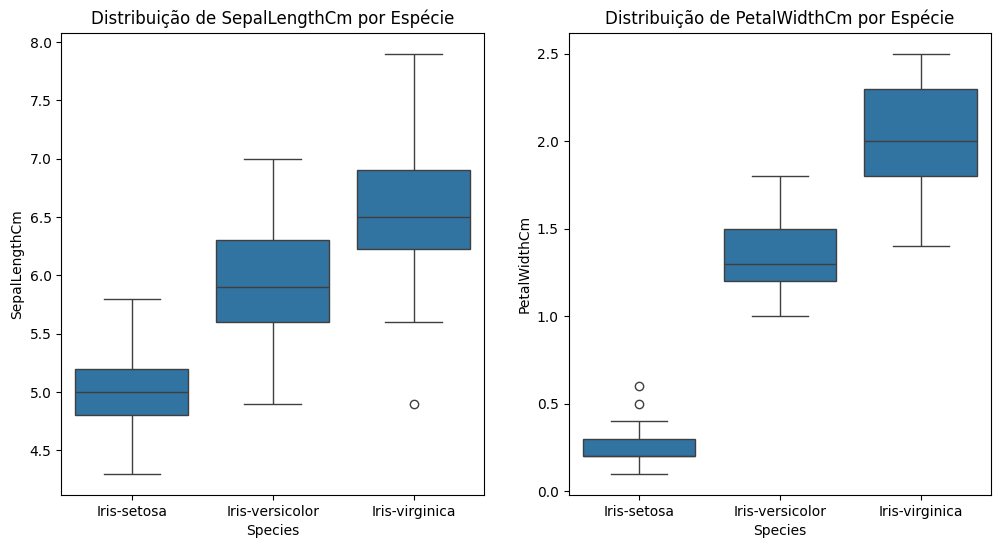

In [6]:
# Distribuição das Características para Cada Espécie
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=data)
plt.title("Distribuição de SepalLengthCm por Espécie")

plt.subplot(1, 2, 2)
sns.boxplot(x='Species', y='PetalWidthCm', data=data)
plt.title("Distribuição de PetalWidthCm por Espécie")
plt.show()


## Gráficos de Distribuição por Espécie

Nesta seção, apresentamos gráficos de distribuição (histogramas) que mostram a distribuição das características "SepalLengthCm" e "PetalWidthCm" para cada espécie de íris no conjunto de dados "Iris".

### Distribuição de SepalLengthCm por Espécie
- O primeiro gráfico de distribuição mostra a distribuição da característica "SepalLengthCm" por espécie. As barras são coloridas por espécie, permitindo a visualização das diferenças na distribuição entre as três espécies.
- A densidade de kernel (kde) é adicionada para estimar a forma da distribuição.
- A configuração "common_norm=False" significa que as áreas sob as curvas não são normalizadas.

### Distribuição de PetalWidthCm por Espécie
- O segundo gráfico de distribuição mostra a distribuição da característica "PetalWidthCm" por espécie, seguindo as mesmas configurações do primeiro gráfico.
- A coloração das barras por espécie permite a comparação das distribuições entre as diferentes espécies.

Esses gráficos de distribuição são valiosos para visualizar a forma das distribuições das características e como elas variam entre as diferentes espécies no conjunto de dados "Iris".



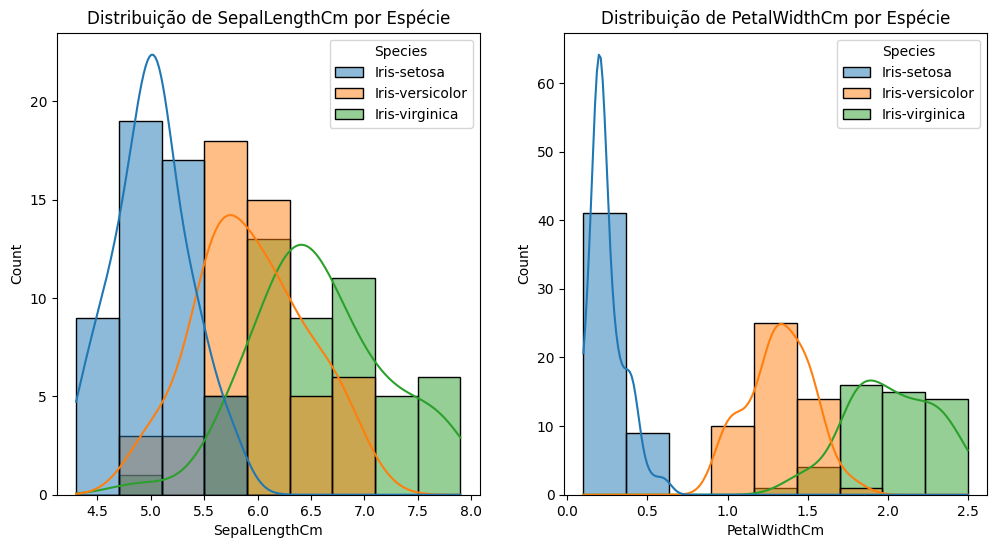

In [8]:
# Gráficos de Distribuição
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data, x='SepalLengthCm', hue='Species', kde=True, common_norm=False)
plt.title("Distribuição de SepalLengthCm por Espécie")

plt.subplot(1, 2, 2)
sns.histplot(data, x='PetalWidthCm', hue='Species', kde=True, common_norm=False)
plt.title("Distribuição de PetalWidthCm por Espécie")
plt.show()


## Box Plots de SepalLengthCm e PetalLengthCm por Espécie

Nesta seção, apresentamos gráficos de caixa (boxplots) que exibem a distribuição das características "SepalLengthCm" e "PetalLengthCm" para cada espécie de íris no conjunto de dados "Iris".

### Box Plot de SepalLengthCm por Espécie
- O primeiro gráfico de caixa mostra a distribuição da característica "SepalLengthCm" para as três espécies: "Iris-setosa", "Iris-versicolor" e "Iris-virginica". Ele destaca a mediana, quartis e possíveis valores atípicos (outliers) na distribuição dessa característica para cada espécie.

### Box Plot de PetalLengthCm por Espécie
- O segundo gráfico de caixa mostra a distribuição da característica "PetalLengthCm" para as mesmas três espécies, seguindo a mesma abordagem do primeiro gráfico. Ele destaca a mediana, quartis e valores atípicos na distribuição dessa característica.

Esses gráficos de caixa são úteis para comparar visualmente como as características variam entre as diferentes espécies de íris, permitindo identificar possíveis diferenças significativas na distribuição.

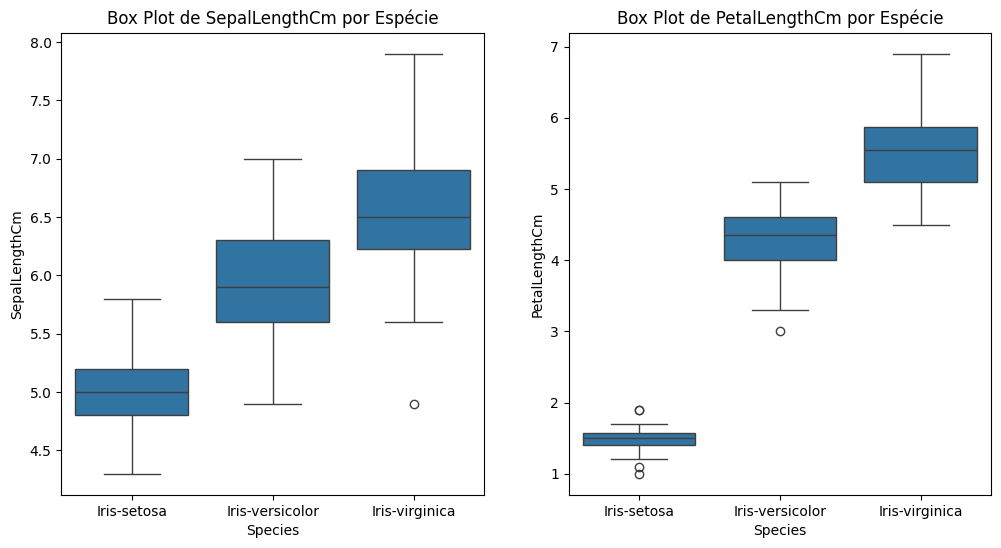

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=data)
plt.title("Box Plot de SepalLengthCm por Espécie")

plt.subplot(1, 2, 2)
sns.boxplot(x='Species', y='PetalLengthCm', data=data)
plt.title("Box Plot de PetalLengthCm por Espécie")
plt.show()

## Relação entre Comprimento e Largura da Pétala por Espécie

Nesta seção, apresentamos um gráfico de dispersão que visualiza a relação entre o comprimento (PetalLengthCm) e a largura (PetalWidthCm) da pétala das flores no conjunto de dados "Iris", codificando as cores das marcas de dispersão por espécie.

- **Eixo X**: Comprimento da pétala (PetalLengthCm)
- **Eixo Y**: Largura da pétala (PetalWidthCm)
- **Cores**: Cada espécie de íris é representada por uma cor distinta, permitindo a diferenciação das espécies no gráfico.

O gráfico de dispersão permite observar visualmente como as características da pétala se relacionam e se diferenciam entre as diferentes espécies de íris. Qualquer tendência ou agrupamento de pontos pode fornecer insights sobre as características distintas de cada espécie.


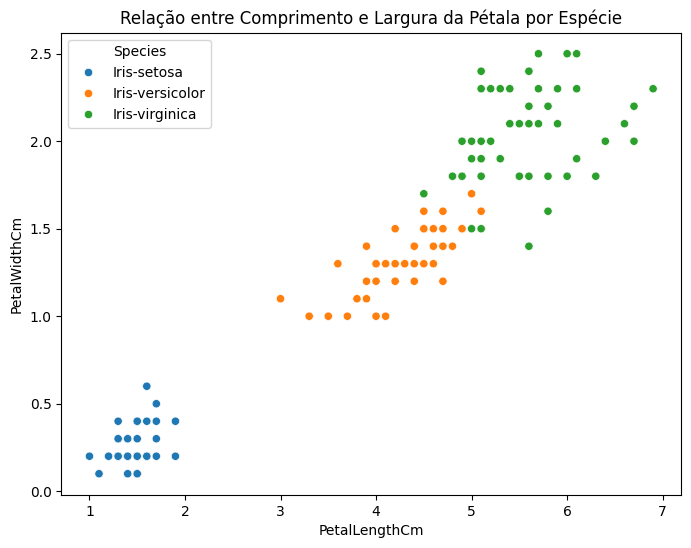

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title("Relação entre Comprimento e Largura da Pétala por Espécie")
plt.show()